## Using Dataset

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# kNN import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

## Used this to get the gather my own playlist data then extrapolated the info by turning them into csv's.

+ http://organizeyourmusic.playlistmachinery.com/

In [3]:
folder_path = './Dataset'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
spot = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the main DataFrame
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    spot = pd.concat([spot, df], ignore_index=True)

In [4]:
spot.head()

,Unnamed: 0,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86
1,2,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81
2,3,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80
3,4,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78
4,5,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78


In [5]:
spot.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
spot.rename(columns = {'dnce': 'dance', 'nrgy': 'energy', 'val': 'valence', 'pop': 'popularity', 'title': 'song title'}, inplace = True)

In [7]:
spot.head()

,song title,artist,top genre,year,added,bpm,energy,dance,dB,live,valence,dur,acous,spch,popularity
0,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86
1,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81
2,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80
3,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78
4,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78


In [8]:
spot.shape

(1409, 15)

In [9]:
spot.isnull().sum()

song title      0
artist          0
top genre     327
year            0
added           0
bpm             0
energy          0
dance           0
dB              0
live            0
valence         0
dur             0
acous           0
spch            0
popularity      0
dtype: int64

In [10]:
#set nulls to a variable to check what they are.
nulls = spot.isnull()

# Create a boolean mask that identifies rows with any null values
rows_with_nulls = nulls.any(axis=1)

# Use the boolean mask to filter the DataFrame and get rows with nulls
rows_containing_nulls = spot[rows_with_nulls]

# Print the rows containing nulls
print(rows_containing_nulls)

                   song title       artist top genre  year       added  bpm  \
28    Smells Like Teen Spirit       Witchz       NaN  2021  1969‑12‑31  114   
49                       RISE         YMIR       NaN  2022  1969‑12‑31  150   
115            So Far So Good  Sun Of They       NaN  2022  2023‑09‑08   74   
116                  Apricity    Imala Zir       NaN  2022  2023‑09‑08   75   
117                  Solatium    Imber Sun       NaN  2022  2023‑09‑08  112   
...                       ...          ...       ...   ...         ...  ...   
1392                     D13.    Kill Dyll       NaN  2022  1969‑12‑31  110   
1394               the motive       BTWRKS       NaN  2022  1969‑12‑31  143   
1396             Ready or Not       Hulvey       NaN  2020  1969‑12‑31  143   
1403                Baby Stop   Altajmusic       NaN  2022  1969‑12‑31   82   
1407             Fall in Line    Yung Rare       NaN  2019  1969‑12‑31  151   

      energy  dance  dB  live  valence  dur  acous 

In [11]:
#Replace all the NaN's with 'Alternative'
spot.fillna('alternative', inplace = True)

In [12]:
spot.isnull().sum()

song title    0
artist        0
top genre     0
year          0
added         0
bpm           0
energy        0
dance         0
dB            0
live          0
valence       0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [13]:
#checking for dupes
title_duplicates = spot['song title'].duplicated()
#looking at the rows if any dupes
title_dupe_rows = spot[title_duplicates]

print(title_dupe_rows)

       song title         artist                top genre  year       added  \
260   In Due Time  Broken Legacy              alternative  2022  2023‑09‑08   
319    Beginnings      Bon Bruit              alternative  2020  2023‑09‑08   
788     Gratitude        HILLEVI              alternative  2021  2023‑09‑05   
804      Apricity  Ivalu Karlsen         background piano  2019  2023‑09‑05   
854        Anyone     Lena Terne              alternative  2022  2023‑09‑05   
...           ...            ...                      ...   ...         ...   
1347     Fly Away    Tones And I           australian pop  2021  2023‑08‑29   
1350      Lil Bit          Nelly                dance pop  2020  2023‑08‑29   
1358   Big Energy          Latto               trap queen  2021  2023‑08‑29   
1377      Enemies      The Score  modern alternative rock  2022  1969‑12‑31   
1393     Detonate             G2           brighton indie  2023  1969‑12‑31   

      bpm  energy  dance  dB  live  valence  dur  a

In [14]:
#Drop the duplicate songs so we do not have any overlap from the downloaded playlists.
spot = spot.drop_duplicates(subset = 'song title')

In [15]:
spot.shape

(1288, 15)

In [16]:
spot.head()

,song title,artist,top genre,year,added,bpm,energy,dance,dB,live,valence,dur,acous,spch,popularity
0,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86
1,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81
2,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80
3,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78
4,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78


In [17]:
final = 'final.csv'

spot.to_csv(final, index = False)

## EDA

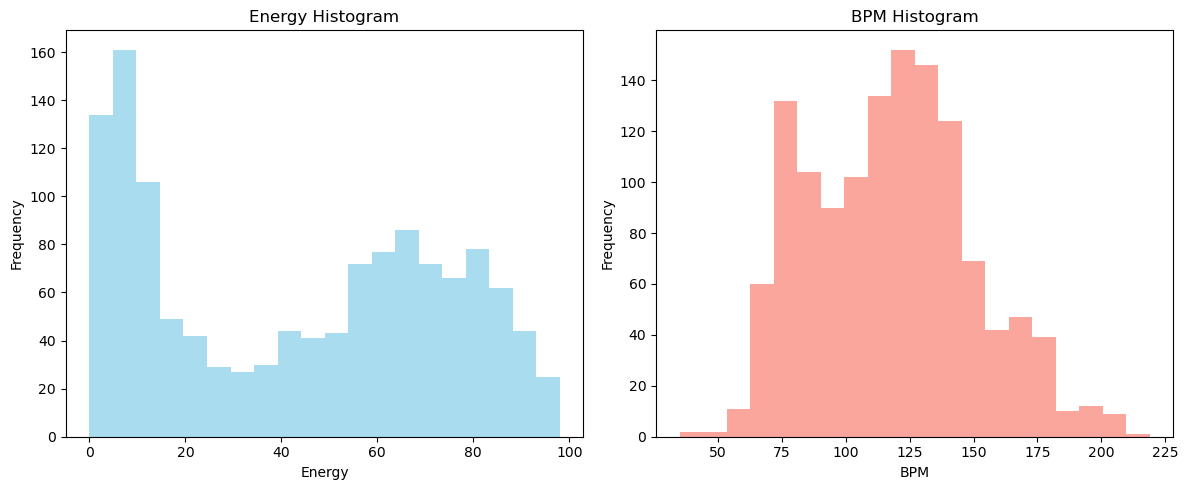

In [16]:
energy = spot['energy']
bpm = spot['bpm']

# Create two subplots for separate histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a histogram for "energy"
ax1.hist(energy, bins=20, color='skyblue', alpha=0.7)
ax1.set_xlabel('Energy')
ax1.set_ylabel('Frequency')
ax1.set_title('Energy Histogram')

# Create a histogram for "bpm"
ax2.hist(bpm, bins=20, color='salmon', alpha=0.7)
ax2.set_xlabel('BPM')
ax2.set_ylabel('Frequency')
ax2.set_title('BPM Histogram')

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()

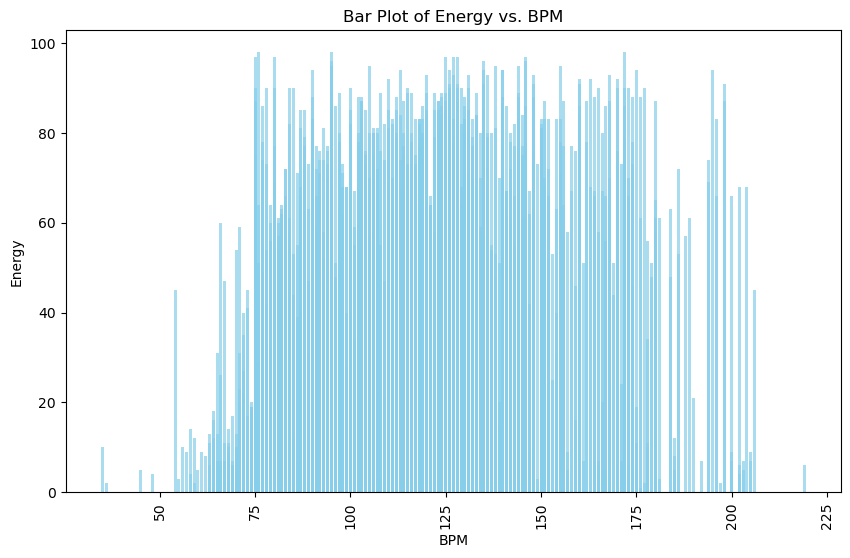

In [17]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(bpm, energy, color='skyblue', alpha=0.7)
plt.xlabel('BPM')
plt.ylabel('Energy')
plt.title('Bar Plot of Energy vs. BPM')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

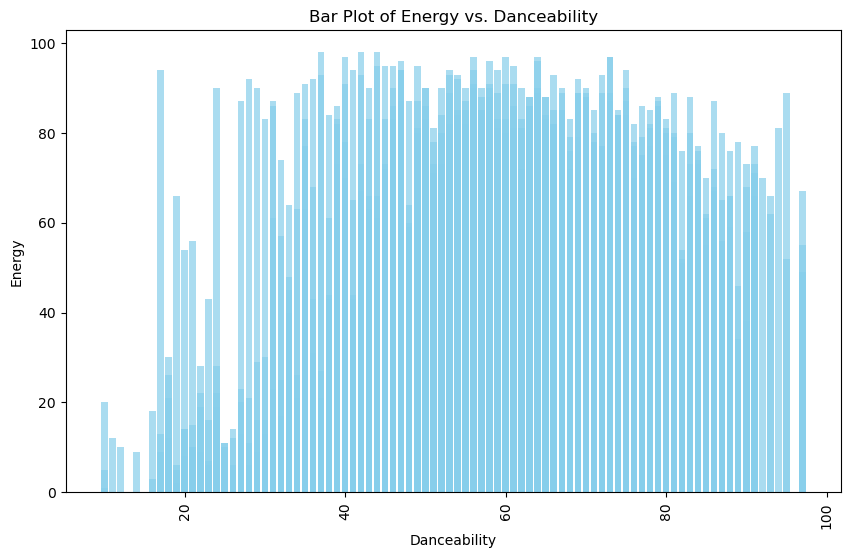

In [18]:
dance = spot['dance']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(dance, energy, color='skyblue', alpha=0.7)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Bar Plot of Energy vs. Danceability')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

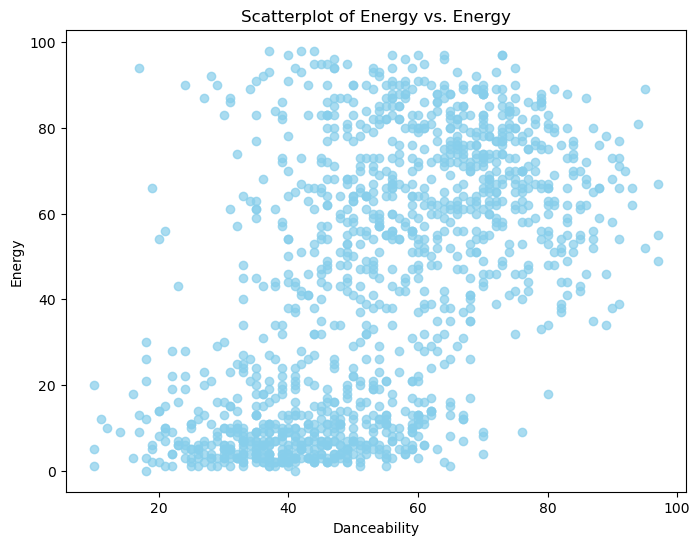

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(dance, energy, color='skyblue', alpha=0.7)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Scatterplot of Energy vs. Energy')
plt.show()

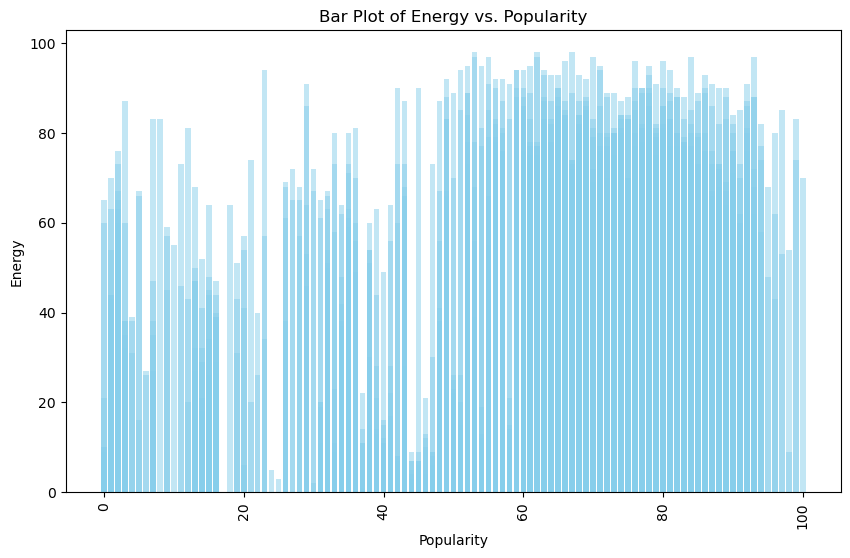

In [20]:
popularity = spot['popularity']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(popularity, energy, color='skyblue', alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('Bar Plot of Energy vs. Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

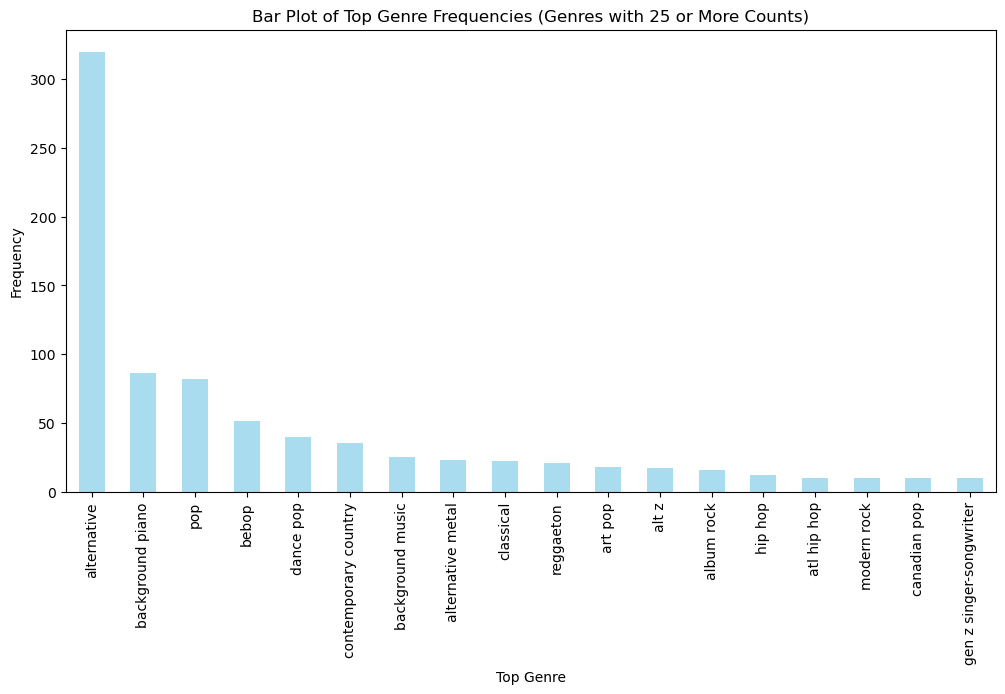

In [21]:
top_genre = spot['top genre']

# Count the frequency of each unique value in the "top genre" column
genre_counts = top_genre.value_counts()

# Filter genres with 25 or more counts
filtered_genre_counts = genre_counts[genre_counts >= 10]

# Create a bar plot for filtered genre frequencies
plt.figure(figsize=(12, 6))
filtered_genre_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Top Genre')
plt.ylabel('Frequency')
plt.title('Bar Plot of Top Genre Frequencies (Genres with 25 or More Counts)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [22]:
spot.head()

,song title,artist,top genre,year,added,bpm,energy,dance,dB,live,valence,dur,acous,spch,popularity
0,Chop Suey!,System Of A Down,alternative metal,2001,1969‑12‑31,127,93,42,-4,13,29,210,0,12,86
1,Just Pretend,Bad Omens,american metalcore,2022,1969‑12‑31,140,83,46,-5,10,20,205,0,8,81
2,Monster,Skillet,alternative metal,2009,1969‑12‑31,135,96,64,-2,8,69,178,4,7,80
3,Popular Monster,Falling In Reverse,alternative metal,2019,1969‑12‑31,165,90,46,-4,10,36,221,1,9,78
4,Watch The World Burn,Falling In Reverse,alternative metal,2023,1969‑12‑31,162,78,40,-6,21,35,204,1,13,78


## Linear Regression to Find Coefficients

In [23]:
X = spot[['bpm', 'dance', 'valence', 'popularity', 'dur']]
y = spot['energy']

In [24]:
X.shape

(1288, 5)

In [25]:
y.shape

(1288,)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X, y)

LinearRegression()

In [28]:
# Take a peek at the model coefficient and intercept
print(f'Model intercept: {lr.intercept_}')
print(f'Model Coefficient: {lr.coef_[0]}')

Model intercept: -44.79799956002157
Model Coefficient: 0.1383934689984302


In [29]:
pd.DataFrame(lr.coef_, index = X.columns)

,0
bpm,0.138393
dance,0.500889
valence,0.400533
popularity,0.279964
dur,0.070473


***For every 1 unit increase in X, we expect energy to increase by Bi holding all else constant.***

+ Holding energy constant, for every 1 unit increase in danceability, we will see a .5 increase in energy. 

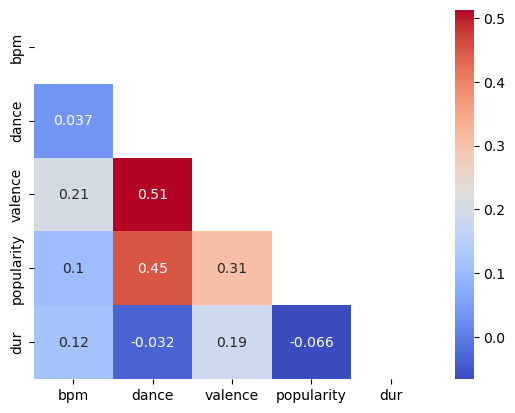

In [30]:
X.corr()

mask = np.zeros_like(X.corr())

mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(),
           cmap = 'coolwarm',
           mask = mask,
           annot = True);